In [25]:
import numpy as np

In [26]:
data = np.load("results.npy")
labels = data.files
labels

['timestamps', 'states', 'controls']

In [27]:
timestamps = data['timestamps']
states = data['states'][0]
controls = data['controls'][0]

print(timestamps.shape, states.shape, controls.shape)

(1, 100352) (16, 100352) (12, 100352)


In [28]:
data_table = np.vstack((timestamps, states))[0:4].T
data_table[0]

array([ 0.03333333,  0.082085  , -2.        , -1.        ])

In [29]:
def reward(row):
    reward = 0
    if row["concentration"] > 0.9:
        reward += row["concentration"] * 1000
    else:
        reward -= (1 - row["concentration"])
    return reward

In [30]:
import pandas as pd

cols = ["timestamp", "concentration",  "x_offset", "y_offset"]
df = pd.DataFrame(data_table, columns=cols)

In [31]:
df["reward"] = df.apply(reward, axis=1)

In [32]:
episode_starts = df[df["timestamp"] < 0.04].index
episode_starts

Index([    0,   704,  3205,  3499,  3500,  3501,  4981,  7157,  7158,  7570,
       ...
       90302, 90845, 91270, 92194, 93260, 93261, 95762, 95763, 97617, 97992],
      dtype='int64', length=293)

In [33]:
episodes = []
for ep, next_ep in zip(episode_starts[:-1], episode_starts[1:]):
	if next_ep - ep == 1:
		continue
	episodes.append(df[ep:next_ep])
episodes.append(df[episode_starts[-1]:])
print(episodes[77])

       timestamp  concentration  x_offset  y_offset       reward
35428   0.033333       1.000000  0.000000  0.000000  1000.000000
35429   0.066667       1.000000  0.000000  0.000000  1000.000000
35430   0.100000       1.000000  0.000000  0.000000  1000.000000
35431   0.133333       1.000000  0.000000  0.000000  1000.000000
35432   0.166667       1.000000  0.000000  0.000000  1000.000000
...          ...            ...       ...       ...          ...
35805  12.600000       0.012183  2.113159 -2.085652    -0.987817
35806  12.633333       0.011488  2.119903 -2.106875    -0.988512
35807  12.666667       0.010824  2.126642 -2.128252    -0.989176
35808  12.700000       0.010190  2.133373 -2.149731    -0.989810
35809  12.733333       0.009588  2.140092 -2.171273    -0.990412

[382 rows x 5 columns]


In [34]:
def episodic_mean_reward(episode_num):
	mean_reward = episodes[episode_num].loc[:, 'reward'].mean()
	return mean_reward

In [35]:
print(episodic_mean_reward(1))

36.839885172572934


In [36]:
def simulation_average_reward():
	average_reward = []
	for episode in range(len(episodes)):
		average_reward.append(episodic_mean_reward(episode))
	return np.mean(average_reward)


In [37]:
print(simulation_average_reward())

27.13489824114692


In [38]:
print(len(episodes))

204


In [39]:
import matplotlib.pyplot  as plt

for episode_number, episode in enumerate(episodes):
	plt.scatter(episode['timestamp'], episode['reward'], s=2.5)
	plt.savefig(f'images/episode_{episode_number}_plot.png')
	plt.clf()

<Figure size 640x480 with 0 Axes>

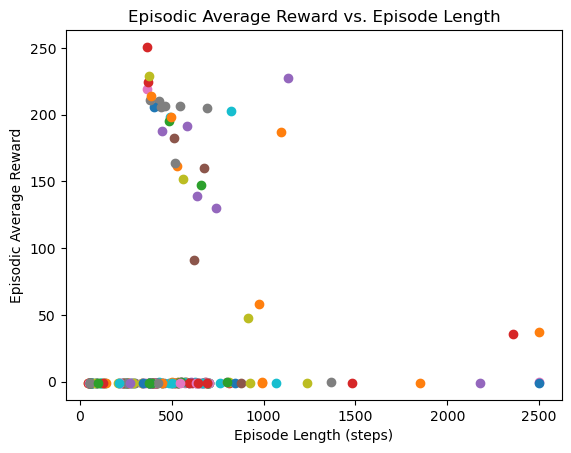

In [40]:
for episode_number, episode in enumerate(episodes):
    plt.scatter(len(episode.index), episodic_mean_reward(episode_number))

plt.title("Episodic Average Reward vs. Episode Length")
plt.xlabel("Episode Length (steps)")
plt.ylabel("Episodic Average Reward")
plt.show()

In [50]:
def trajectory(episode, episode_number):
    plt.scatter(episode['x_offset'], episode['y_offset'], s=2.5)
    plt.savefig(f'trajectories/episode_{episode_number}_trajectory.png')
    plt.clf()

In [51]:
for episode_number, episode in enumerate(episodes):
    trajectory(episode, episode_number)

<Figure size 640x480 with 0 Axes>